In [353]:
import pandas as pd
import random
import collections
import matplotlib.pyplot as plt



In [515]:
data = pd.read_csv("Data/data-cumulative/Apple-data.csv")

In [516]:
data.head()

,Timestamp,A0nymous,First-Name,Last-Name,Email-Address,Referrers-Email-Address,Age,Gender,Occupation, Watch,...,Credit-Card-Information,Facebook-Twitter-Instagram-profile,Health-and-Fitness-Data,IP-address,Location,Photos,Videos,Voice-Recordings,Your-friend's-family's-information,travel-log
0,10/21/2019 20:00:46,0,Prayani,Singh,psingh25@ncsu.edu,psingh25@ncsu.edu,26,Female,Student,1,...,0,0,1,1,1,1,0,1,1,0
1,10/21/2019 20:05:50,0,Khushi,Patel,khushippatel22@gmail.com,Dvija Patel,22,Female,Student,1,...,0,0,0,0,1,0,0,0,0,0
2,10/21/2019 21:12:31,0,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student,1,...,0,0,1,0,1,0,0,0,0,0
3,10/22/2019 8:06:15,0,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student,1,...,0,0,1,1,1,0,0,0,1,0
4,10/21/2019 20:16:13,0,Toral,Patel,toralpatel1970@yahoo.com,dvijapatel@gmail.com Dvija patel,45,Female,Working professional,1,...,0,0,0,0,1,0,0,0,0,0


In [517]:
import math
dataUserAwareness = data[["Delete-data-apple","limit-ad-tracking-apple","reset-digital-fingerprint-apple",  "Apple-share-data-for-marketing-purpose","profile-user-apple"]]
dataUserAwareness = dataUserAwareness.replace("No",0)
dataUserAwareness = dataUserAwareness.replace("Yes",1)
dataUserAwareness['Sum'] = dataUserAwareness.sum(axis=1)
dataUserAwareness['Metric'] = dataUserAwareness['Sum']/3
dataUserAwareness.loc[dataUserAwareness.Metric > 1.0, 'Metric']-=1.0
dataUserAwareness['Metric'] = (dataUserAwareness['Metric']*100)
dataUserAwareness

,Delete-data-apple,limit-ad-tracking-apple,reset-digital-fingerprint-apple,Apple-share-data-for-marketing-purpose,profile-user-apple,Sum,Metric
0,0,0,0,0,1,1,33.333333
1,0,0,0,0,1,1,33.333333
2,0,1,1,1,1,4,33.333333
3,1,1,1,1,1,5,66.666667
4,0,0,0,0,1,1,33.333333
5,0,1,1,1,1,4,33.333333
6,0,0,0,1,1,2,66.666667
7,1,1,0,1,1,4,33.333333
8,0,1,1,1,1,4,33.333333
9,0,0,0,0,1,1,33.333333


In [518]:
#average User awareness
sum(dataUserAwareness['Metric'])/len(dataUserAwareness)

64.44444444444444

In [519]:
import collections
UserAwarenessBins = dict(collections.Counter(dataUserAwareness['Metric']))
UserAwarenessBins

{33.33333333333333: 11, 66.66666666666667: 1, 66.66666666666666: 9, 100.0: 9}

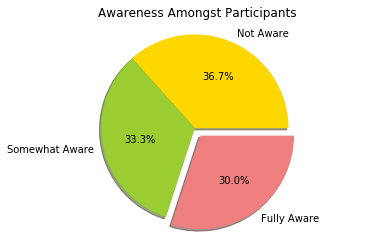

In [693]:
labels = 'Not Aware', 'Somewhat Aware', 'Fully Aware'
sizes = [11, 10, 9]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.title('Awareness Amongst Participants')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

Number of People don't own an apple watch who changed their Persepective:  9
Number of People don't own an apple watch who did not changed their Persepective:  6


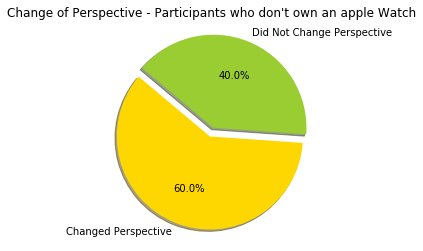

In [561]:
dataPerspectiveChange = data[['Enabled-ad-tracking-question', 'Change-perspective-apple' ]]
dataPerspectiveChange = dataPerspectiveChange.replace("No", 0)
dataPerspectiveChange = dataPerspectiveChange.replace("Yes", 1)
dataPerspectiveChange = dataPerspectiveChange.replace("Maybe", 0.5)
numberOfChangeInPerspectiveNotOwn = 0
numberOfNoChangeInPersepectiveNotOwn = 0

for own,change in zip(dataPerspectiveChange['Enabled-ad-tracking-question'],dataPerspectiveChange['Change-perspective-apple']):
    if own == -1 and change >= 0.5:
        #print("Change:=", own,change)
        numberOfChangeInPerspectiveNotOwn += 1
for own,change in zip(dataPerspectiveChange['Enabled-ad-tracking-question'],dataPerspectiveChange['Change-perspective-apple']):
    if own == -1 and change <= 0.5:
        #print("No Change:=",own,change)
        numberOfNoChangeInPersepectiveNotOwn += 1
        
print("Number of People don't own an apple watch who changed their Persepective: ", numberOfChangeInPerspectiveNotOwn)
print("Number of People don't own an apple watch who did not changed their Persepective: ", numberOfNoChangeInPersepectiveNotOwn)
labels = 'Changed Perspective', 'Did Not Change Perspective'
sizes = [9,6]
colors = ['gold', 'yellowgreen']# Plot
explode = [0.1,0]
plt.title("Change of Perspective - Participants who don't own an apple Watch" )
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Change:= 1 1
No Change:= 1 0
No Change:= 1 0
No Change:= 1 0
Number of People own an apple watch who changed their Persepective:  1
Number of People own an apple watch who did not changed their Persepective:  3


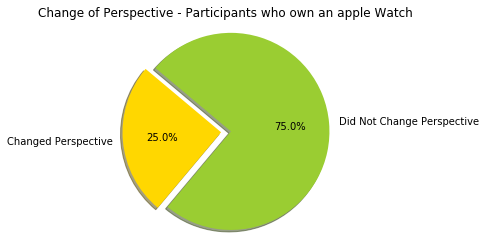

In [563]:
numberOfChangeInPerspectiveOwn = 0
numberOfNoChangeInPersepectiveOwn = 0
for own,change in zip(dataPerspectiveChange['Enabled-ad-tracking-question'],dataPerspectiveChange['Change-perspective-apple']):
    if own == 1 and change >= 0.5:
        print("Change:=", own,change)
        numberOfChangeInPerspectiveOwn += 1
for own,change in zip(dataPerspectiveChange['Enabled-ad-tracking-question'],dataPerspectiveChange['Change-perspective-apple']):
    if own == 1 and change <= 0.5:
        print("No Change:=",own,change)
        numberOfNoChangeInPersepectiveOwn += 1
        
print("Number of People own an apple watch who changed their Persepective: ", numberOfChangeInPerspectiveOwn)
print("Number of People own an apple watch who did not changed their Persepective: ", numberOfNoChangeInPersepectiveOwn)

labels = 'Changed Perspective', 'Did Not Change Perspective'
sizes = [1,3]
colors = ['gold', 'yellowgreen']# Plot
explode = [0.1,0]
plt.title("Change of Perspective - Participants who own an apple Watch" )
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

{1: 26, 0: 3, 2: 1}
Percent People Use this survey to better protet themselves: 86.66666666666667
Percent Did not find the survey useful 10.0


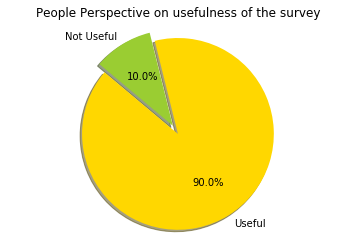

In [565]:
dataBetterProtect = data[['Better-protect-apple']]
dataBetterProtect = dataBetterProtect.replace('Yes', 1)
dataBetterProtect = dataBetterProtect.replace('No', 0)
dataBetterProtect = dataBetterProtect.replace('No new information was provided', 0)
dataBetterProtectDict = dict(collections.Counter(dataBetterProtect['Better-protect-apple']))
print(dataBetterProtectDict)
print("Percent People Use this survey to better protet themselves:",((dataBetterProtectDict[1.0])/len(data[['Better-protect-apple']]))*100)
print("Percent Did not find the survey useful",((dataBetterProtectDict[0.0])/len(data[['Better-protect-apple']]))*100)

labels = 'Useful', 'Not Useful'
sizes = [27,3]
colors = ['gold', 'yellowgreen']# Plot
explode = [0.1,0]
plt.title("People Perspective on usefulness of the survey" )
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [529]:
dataYouThinkAppleCollects = data
dataYouThinkAppleCollects

,Timestamp,A0nymous,First-Name,Last-Name,Email-Address,Referrers-Email-Address,Age,Gender,Occupation, Watch,...,Credit-Card-Information,Facebook-Twitter-Instagram-profile,Health-and-Fitness-Data,IP-address,Location,Photos,Videos,Voice-Recordings,Your-friend's-family's-information,travel-log
0,10/21/2019 20:00:46,0,Prayani,Singh,psingh25@ncsu.edu,psingh25@ncsu.edu,26,Female,Student,1,...,0,0,1,1,1,1,0,1,1,0
1,10/21/2019 20:05:50,0,Khushi,Patel,khushippatel22@gmail.com,Dvija Patel,22,Female,Student,1,...,0,0,0,0,1,0,0,0,0,0
2,10/21/2019 21:12:31,0,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student,1,...,0,0,1,0,1,0,0,0,0,0
3,10/22/2019 8:06:15,0,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student,1,...,0,0,1,1,1,0,0,0,1,0
4,10/21/2019 20:16:13,0,Toral,Patel,toralpatel1970@yahoo.com,dvijapatel@gmail.com Dvija patel,45,Female,Working professional,1,...,0,0,0,0,1,0,0,0,0,0
5,10/21/2019 20:00:41,1,NaN,NaN,NaN,NaN,26,Female,Student,0,...,0,0,0,1,1,0,0,1,0,0
6,10/24/2019 9:16:33,0,Nida,Syed,nsyed@ncsu.edu,NaN,24,Female,Student,1,...,0,0,1,1,1,0,0,0,0,0
7,10/22/2019 1:01:26,0,Swathi,Dinakaran,sdinaka@ncsu.edu,NaN,23,Female,Student,0,...,0,0,1,0,1,0,0,1,0,0
8,10/21/2019 20:06:27,1,NaN,NaN,NaN,NaN,22,Prefer 0t to say,Student,1,...,1,1,1,1,1,1,0,1,0,0
9,10/21/2019 20:42:17,0,Taric,Jain,taricjain@outlook.com,dvijapatel@gmail.com,22,Male,Working professional,0,...,0,0,1,1,1,0,0,0,0,0


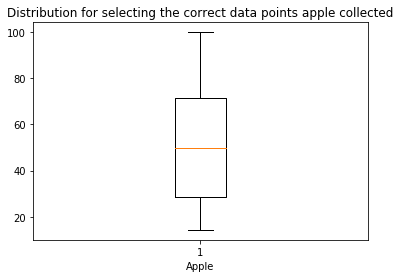

In [579]:
plt.title('Distribution for selecting the correct data points apple collected')
plt.boxplot(dataToWorkWithCopy['Metric'])
plt.xlabel("Apple")
plt.show()

In [590]:
x = input().split('	')

Call-logs	Contacts	Credit-Card-Information	Facebook-Twitter-Instagram-profile	Health-and-Fitness-Data	IP-address	Location	Photos	Videos	Voice-Recordings	Your-friend's-family's-information	travel-log


In [591]:
x

['Call-logs',
 'Contacts',
 'Credit-Card-Information',
 'Facebook-Twitter-Instagram-profile',
 'Health-and-Fitness-Data',
 'IP-address',
 'Location',
 'Photos',
 'Videos',
 'Voice-Recordings',
 "Your-friend's-family's-information",
 'travel-log']

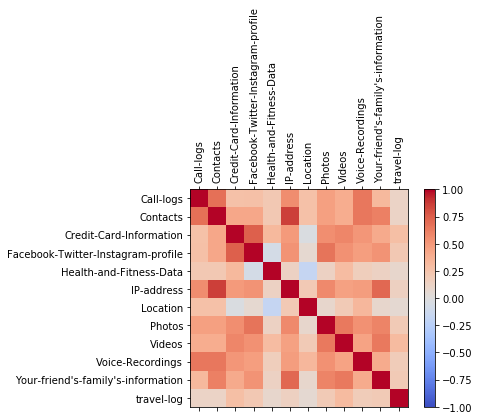

In [593]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = dataToWorkWithCopy[x].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataToWorkWithCopy[x].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataToWorkWithCopy[x].columns)
ax.set_yticklabels(dataToWorkWithCopy[x].columns)
plt.show()

In [533]:
dataDosToworkWith = data[listDosOfDataToWorkWith]

In [535]:
listDosOfDataToWorkWith = ['Age',
 'Gender',
 'Call-logs',
 'Location',
 'Photos',
 'Voice-Recordings',
 'Health-and-Fitness-Data',
 'Contacts',
 "Your-friend's-family's-information",
 'IP-address',
 'Facebook-Twitter-Instagram-profile',
 'Credit-Card-Information',
 'Videos']

In [537]:
dataDosToworkWith = (dataDosToworkWith[listDosOfDataToWorkWith])

In [538]:
dataDos = pd.read_csv("Data/data-cumulative/Apple-Table-2.csv")
dataDos

,Timestamp,Anonymous,First-Name,Last-Name,Email-Address,Referrers-Email-Address,Age,Gender,Occupation, Watch,...,Credit-Card-Information,Facebook-Twitter-Instagram-profile,Health-and-Fitness-Data,IP-address,Location,Photos,Videos,Voice-Recordings,Your-friend's-family's-information,travel-log
0,10/21/2019 20:00:46,0,Prayani,Singh,psingh25@ncsu.edu,psingh25@ncsu.edu,26,Female,Student,1,...,0,0,1,1,1,1,0,1,1,0
1,10/21/2019 20:05:50,0,Khushi,Patel,khushippatel22@gmail.com,Dvija Patel,22,Female,Student,1,...,0,0,0,0,1,0,0,0,0,0
2,10/21/2019 21:12:31,0,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student,1,...,0,0,1,0,1,0,0,0,0,0
3,10/22/2019 8:06:15,0,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student,1,...,0,0,1,1,1,0,0,0,1,0
4,10/21/2019 20:16:13,0,Toral,Patel,toralpatel1970@yahoo.com,dvijapatel@gmail.com Dvija patel,45,Female,Working professional,1,...,0,0,0,0,1,0,0,0,0,0
5,10/21/2019 20:00:41,1,NaN,NaN,NaN,NaN,26,Female,Student,0,...,0,0,0,1,1,0,0,1,0,0
6,10/24/2019 9:16:33,0,Nida,Syed,nsyed@ncsu.edu,NaN,24,Female,Student,1,...,0,0,1,1,1,0,0,0,0,0
7,10/22/2019 1:01:26,0,Swathi,Dinakaran,sdinaka@ncsu.edu,NaN,23,Female,Student,0,...,0,0,1,0,1,0,0,1,0,0
8,10/21/2019 20:06:27,1,NaN,NaN,NaN,NaN,22,Prefer not to say,Student,1,...,1,1,1,1,1,1,0,1,0,0
9,10/21/2019 20:42:17,0,Taric,Jain,taricjain@outlook.com,dvijapatel@gmail.com,22,Male,Working professional,0,...,0,0,1,1,1,0,0,0,0,0


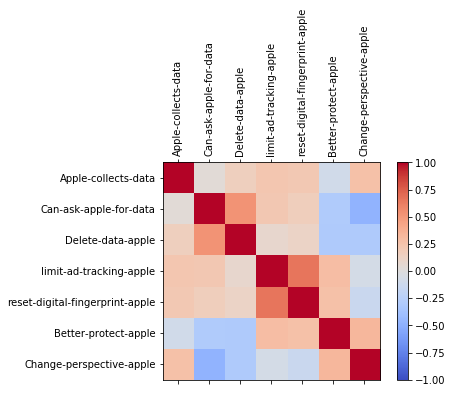

In [685]:
listDosOfDataToWorkWith = [
 'Apple-collects-data',
 'Can-ask-apple-for-data',
 'Delete-data-apple',
 'limit-ad-tracking-apple',
 'reset-digital-fingerprint-apple',
 'Better-protect-apple',
 'Change-perspective-apple',
]
len(listDosOfDataToWorkWith)
corr = dataDos[listDosOfDataToWorkWith].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataDos[listDosOfDataToWorkWith].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataDos[listDosOfDataToWorkWith].columns)
ax.set_yticklabels(dataDos[listDosOfDataToWorkWith].columns)
plt.show()

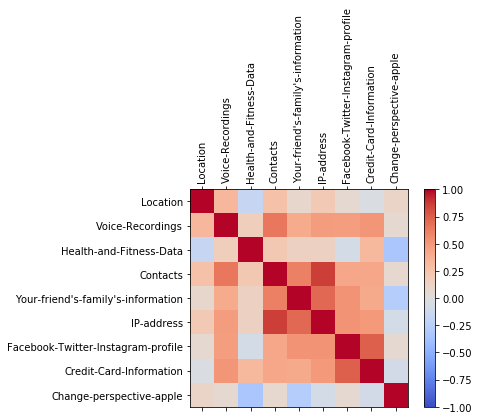

In [689]:
listDosOfDataToWorkWith = [
 'Location',
 'Voice-Recordings',
 'Health-and-Fitness-Data',
 'Contacts',
 "Your-friend's-family's-information",
 'IP-address',
 'Facebook-Twitter-Instagram-profile',
 'Credit-Card-Information',
'Change-perspective-apple']
len(listDosOfDataToWorkWith)
corr = dataDos[listDosOfDataToWorkWith].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataDos[listDosOfDataToWorkWith].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataDos[listDosOfDataToWorkWith].columns)
ax.set_yticklabels(dataDos[listDosOfDataToWorkWith].columns)
plt.show()

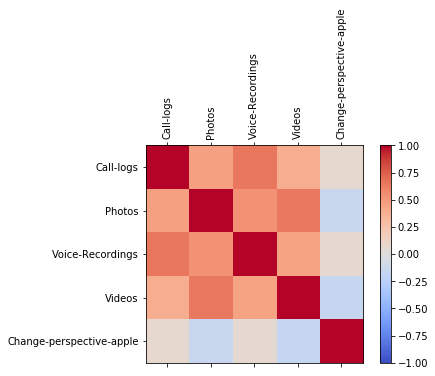

In [690]:
listDosOfDataToWorkWith = [
 'Call-logs',
 'Photos',
 'Voice-Recordings',
 'Videos',
'Change-perspective-apple']
len(listDosOfDataToWorkWith)
corr = dataDos[listDosOfDataToWorkWith].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataDos[listDosOfDataToWorkWith].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataDos[listDosOfDataToWorkWith].columns)
ax.set_yticklabels(dataDos[listDosOfDataToWorkWith].columns)
plt.show()

In [594]:
dataSnapChat = pd.read_csv("Data/data-cumulative/Snapchat-Table.csv")

In [633]:
dataSnapChat.head()

,Timestamp,Anonymous,First-Name,Last-Name,Email-Address,Referrers-Email-Address,Age,Gender,Occupation,Devices,...,Location-history-and-precise-current-location,Search-queries,Which-stories-are-being-watched-on-Discover,Frequency-and-nature-of-messages-with-individuals,Phone-model--and-OS,Filters-applied-on-Stories,Information-from-your-Microphone,Phonebook-and-call-logs,Apps-installed-on-phone,Everything-visible-via-the-Spectacles-camera
0,10/21/2019 20:00:04,No,Sagar,Bajaj,sbajaj@ncsu.edu,NaN,23,Male,Student,Levi's Tucker Jacket,...,0,0,0,0,0,0,0,0,0,0
1,10/21/2019 21:12:31,No,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0
2,10/22/2019 8:06:15,No,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0
3,10/21/2019 20:16:13,No,Toral,Patel,toralpatel1970@yahoo.com,dvijapatel@gmail.com Dvija patel,45,Female,Working professional, Watch,...,0,0,0,0,0,0,0,0,0,0
4,10/22/2019 18:22:41,Yes,NaN,NaN,NaN,NaN,22,Male,Student,"Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0


In [601]:
listOfDataSnapchatCollects = []
for individualResponses in dataSnapChat['Data-you-think-snapchat-collects']:
    listToParse = individualResponses.split(', ')
    for element in listToParse:
        element = element.replace(" ", "-")
        if element in listOfDataSnapchatCollects:
            continue
        else:
            listOfDataSnapchatCollects.append(element)
print(listOfDataSnapchatCollects)

['All-photos-and-camera', 'Location-history-and-precise-current-location', 'Search-queries', 'Which-stories-are-being-watched-on-Discover', 'Frequency-and-nature-of-messages-with-individuals', 'Phone-model--and-OS', 'Filters-applied-on-Stories', 'Information-from-your-Microphone', 'Phonebook-and-call-logs', 'Apps-installed-on-phone', 'Everything-visible-via-the-Spectacles-camera']


In [602]:
for eachCategory in listOfDataSnapchatCollects:
    dataSnapChat[eachCategory] = 0

In [627]:
collumnsToConsider = []
collumnsToConsider = listOfDataSnapchatCollects.copy()

In [656]:
dataSnapChat

,Timestamp,Anonymous,First-Name,Last-Name,Email-Address,Referrers-Email-Address,Age,Gender,Occupation,Devices,...,Location-history-and-precise-current-location,Search-queries,Which-stories-are-being-watched-on-Discover,Frequency-and-nature-of-messages-with-individuals,Phone-model--and-OS,Filters-applied-on-Stories,Information-from-your-Microphone,Phonebook-and-call-logs,Apps-installed-on-phone,Everything-visible-via-the-Spectacles-camera
0,10/21/2019 20:00:04,No,Sagar,Bajaj,sbajaj@ncsu.edu,NaN,23,Male,Student,Levi's Tucker Jacket,...,0,0,0,0,0,0,0,0,0,0
1,10/21/2019 21:12:31,No,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0
2,10/22/2019 8:06:15,No,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0
3,10/21/2019 20:16:13,No,Toral,Patel,toralpatel1970@yahoo.com,dvijapatel@gmail.com Dvija patel,45,Female,Working professional, Watch,...,0,0,0,0,0,0,0,0,0,0
4,10/22/2019 18:22:41,Yes,NaN,NaN,NaN,NaN,22,Male,Student,"Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0
5,10/21/2019 20:06:27,Yes,NaN,NaN,NaN,NaN,22,Prefer not to say,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,0,0,0,0,0,0,0,0,0,0
6,10/21/2019 20:42:17,No,Taric,Jain,taricjain@outlook.com,dvijapatel@gmail.com,22,Male,Working professional,VR headset like Oculus,...,0,0,0,0,0,0,0,0,0,0
7,10/21/2019 23:54:59,No,Ritul,Patel,ritulpatel17699@gmail.com,ritulpatel17699@gmail.com,22,Male,Working professional,Snapchat Glasses,...,0,0,0,0,0,0,0,0,0,0


In [662]:
counter = 0
for eachResponse in dataSnapChat['Data-you-think-snapchat-collects']:
    listToParse  = eachResponse.split(', ')
    
    for eachCategory in listToParse:
        eachCategory = (eachCategory.replace(' ', '-'))
        dataSnapChat[eachCategory][counter] = 1
    counter += 1

/Users/jubeenshah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [663]:
dataSnapChat

,Timestamp,Anonymous,First-Name,Last-Name,Email-Address,Referrers-Email-Address,Age,Gender,Occupation,Devices,...,Location-history-and-precise-current-location,Search-queries,Which-stories-are-being-watched-on-Discover,Frequency-and-nature-of-messages-with-individuals,Phone-model--and-OS,Filters-applied-on-Stories,Information-from-your-Microphone,Phonebook-and-call-logs,Apps-installed-on-phone,Everything-visible-via-the-Spectacles-camera
0,10/21/2019 20:00:04,No,Sagar,Bajaj,sbajaj@ncsu.edu,NaN,23,Male,Student,Levi's Tucker Jacket,...,1,1,1,1,1,1,1,1,1,1
1,10/21/2019 21:12:31,No,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,1,1,1,1,1,0,0,0,0,0
2,10/22/2019 8:06:15,No,Sahil,Mehta,mehtasahil31@gmail.com,NaN,23,Male,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,1,1,1,1,0,1,0,0,0,0
3,10/21/2019 20:16:13,No,Toral,Patel,toralpatel1970@yahoo.com,dvijapatel@gmail.com Dvija patel,45,Female,Working professional, Watch,...,0,0,0,1,0,0,0,0,0,0
4,10/22/2019 18:22:41,Yes,NaN,NaN,NaN,NaN,22,Male,Student,"Snapchat Glasses, Levi's Tucker Jacket",...,0,1,0,1,0,1,1,1,0,0
5,10/21/2019 20:06:27,Yes,NaN,NaN,NaN,NaN,22,Prefer not to say,Student," Watch, Snapchat Glasses, Levi's Tucker Jacket",...,1,0,0,0,1,1,0,1,1,0
6,10/21/2019 20:42:17,No,Taric,Jain,taricjain@outlook.com,dvijapatel@gmail.com,22,Male,Working professional,VR headset like Oculus,...,0,1,1,0,1,1,0,1,0,0
7,10/21/2019 23:54:59,No,Ritul,Patel,ritulpatel17699@gmail.com,ritulpatel17699@gmail.com,22,Male,Working professional,Snapchat Glasses,...,1,0,1,1,1,0,1,0,0,1


In [672]:
collumnsToConsider.append('change-perspective-snapchat')
dataSnapChat['change-perspective-snapchat'] = dataSnapChat['change-perspective-snapchat'].replace("Yes",1)
dataSnapChat['change-perspective-snapchat'] = dataSnapChat['change-perspective-snapchat'].replace("No",0)

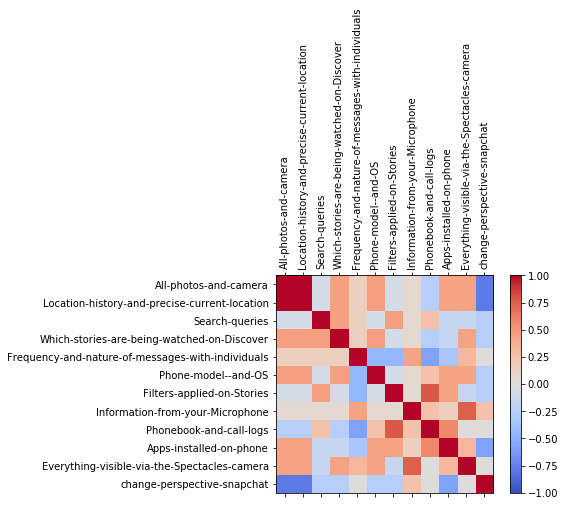

In [676]:
corr = dataSnapChat[collumnsToConsider].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataSnapChat[collumnsToConsider].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataSnapChat[collumnsToConsider].columns)
ax.set_yticklabels(dataSnapChat[collumnsToConsider].columns)
plt.show()